In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
import scipy.stats
from scipy.stats import norm, binom, poisson
from dtaidistance import dtw

import json

### Intepolate between clear-sunset and rain-sunset
- cloudiness
- precipitation
- precipitation_deposits
- wetness
- fog_density
- wind_intensity

### Layered folders, parse into 2d lists of dicts

In [44]:
import os

txt_lists = [[], [], [], [], [], []]

for root, dirs, files in os.walk("./campaign_results_new/route_highway_epoch24_clear-sunset_fi_ghost_cutin"):
    for file in files:
        if file.endswith(".txt"):
             with open(os.path.join(root, file), encoding = 'utf-8') as f:
                read_string = f.read()
                json_object = json.loads(read_string)
                txt_lists[0].append(json_object)
                
for root, dirs, files in os.walk("./campaign_results_new/route_highway_epoch24_rain-sunset-20_fi_ghost_cutin"):
    for file in files:
        if file.endswith(".txt"):
             with open(os.path.join(root, file), encoding = 'utf-8') as f:
                read_string = f.read()
                json_object = json.loads(read_string)
                txt_lists[1].append(json_object)
                
for root, dirs, files in os.walk("./campaign_results_new/route_highway_epoch24_rain-sunset-40_fi_ghost_cutin"):
    for file in files:
        if file.endswith(".txt"):
             with open(os.path.join(root, file), encoding = 'utf-8') as f:
                read_string = f.read()
                json_object = json.loads(read_string)
                txt_lists[2].append(json_object)
                
for root, dirs, files in os.walk("./campaign_results_new/route_highway_epoch24_rain-sunset-60_fi_ghost_cutin"):
    for file in files:
        if file.endswith(".txt"):
             with open(os.path.join(root, file), encoding = 'utf-8') as f:
                read_string = f.read()
                json_object = json.loads(read_string)
                txt_lists[3].append(json_object)
                
for root, dirs, files in os.walk("./campaign_results_new/route_highway_epoch24_rain-sunset-80_fi_ghost_cutin"):
    for file in files:
        if file.endswith(".txt"):
             with open(os.path.join(root, file), encoding = 'utf-8') as f:
                read_string = f.read()
                json_object = json.loads(read_string)
                txt_lists[4].append(json_object)
                
for root, dirs, files in os.walk("./campaign_results_new/route_highway_epoch24_rain-sunset-100_fi_ghost_cutin"):
    for file in files:
        if file.endswith(".txt"):
             with open(os.path.join(root, file), encoding = 'utf-8') as f:
                read_string = f.read()
                json_object = json.loads(read_string)
                txt_lists[5].append(json_object)

### Examining results

In [59]:
count_array = []
for txt_list in txt_lists:
    count = 0
    for txt in txt_list:
        if txt['_checkpoint']['records'][0]['status'] == 'Completed':
            count += 1
    count_array.append(count/100)
    
print(count_array)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [63]:
count_array = []
for txt_list in txt_lists:
    count = 0
    for txt in txt_list:
        count += txt['_checkpoint']['records'][0]['scores']['score_route']
    count_array.append(count/100)
    
print(count_array)

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


### Setting up into 2d lists of DataFrames

In [104]:
dim = (6, 100)
df_array = np.ndarray(dim, dtype=object)

In [190]:
dir_path = './campaign_results_new'

# list to store files
res = []
count = 0

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    
    print(path)
    if not os.path.isfile(os.path.join(dir_path, path)):
        folder_list = []
        for folder in os.listdir(os.path.join(dir_path, path)):
            folder_list.append(folder)
        folder_list.sort()
        print(folder_list)
        for i in range(len(folder_list)): 
            folder = folder_list[i]
            temp = os.path.join(os.path.join(dir_path, path), folder)
            file_array = []
            for file in os.listdir(temp):
                file_array.append(file)
            file_array.sort()
            df = pd.DataFrame()
            for file in file_array:
                if "_ctl.csv" in file:
                    df = pd.read_csv(temp + '/' + file)
                elif "_cvip.csv" in file:
                    df = pd.concat([df, pd.read_csv(temp + '/' + file)], axis=1)
                elif "_traj.csv" in file:
                    df = pd.concat([df, pd.read_csv(temp + '/' + file)], axis=1)
            df_array[count][i%100]=df
    count += 1

route_highway_epoch24_clear-sunset_fi_ghost_cutin
['route_highway_epoch24_clear-sunset_fi_ghost_cutin_0', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_1', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_10', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_11', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_12', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_13', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_14', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_15', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_16', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_17', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_18', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_19', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_2', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_20', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_21', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_22', 'route_highway_epoch24_clear-sunset_fi_ghost_cutin_23', 

route_highway_epoch24_rain-sunset-60_fi_ghost_cutin
['route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_0', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_1', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_10', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_11', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_12', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_13', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_14', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_15', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_16', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_17', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_18', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_19', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_2', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_20', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_21', 'route_highway_epoch24_rain-sunset-60_fi_ghost_cutin_22', 'route_highway_epoch24

route_highway_epoch24_rain-sunset-40_fi_ghost_cutin
['route_highway_epoch24_rain-sunset-40_fi_ghost_cutin_0', 'route_highway_epoch24_rain-sunset-40_fi_ghost_cutin_1', 'route_highway_epoch24_rain-sunset-40_fi_ghost_cutin_10', 'route_highway_epoch24_rain-sunset-40_fi_ghost_cutin_11', 'route_highway_epoch24_rain-sunset-40_fi_ghost_cutin_12', 'route_highway_epoch24_rain-sunset-40_fi_ghost_cutin_13', 'route_highway_epoch24_rain-sunset-40_fi_ghost_cutin_14', 'route_highway_epoch24_rain-sunset-40_fi_ghost_cutin_15', 'route_highway_epoch24_rain-sunset-40_fi_ghost_cutin_16', 'route_highway_epoch24_rain-sunset-40_fi_ghost_cutin_17', 'route_highway_epoch24_rain-sunset-40_fi_ghost_cutin_18', 'route_highway_epoch24_rain-sunset-40_fi_ghost_cutin_19', 'route_highway_epoch24_rain-sunset-40_fi_ghost_cutin_2', 'route_highway_epoch24_rain-sunset-40_fi_ghost_cutin_20', 'route_highway_epoch24_rain-sunset-40_fi_ghost_cutin_21', 'route_highway_epoch24_rain-sunset-40_fi_ghost_cutin_22', 'route_highway_epoch24

In [181]:
df_array[5][50]

,ts,agent_id,throttle,steer,brake,ts,agent_id,cvip,cvip_x,cvip_y,cvip_z,ts,agent_id,x,y,z,v
0,735515,0,0.900000,-0.000579,0.0,735515,0,500.491189,198.767441,-95.832657,-499.819366,735515,0,192.362411,-86.262680,0.539326,0.000000
1,735516,0,0.900000,-0.010304,0.0,735516,0,5.595580,195.567444,-90.832657,0.100000,735516,0,192.362411,-86.262680,0.491906,0.000000
2,735517,0,0.900000,-0.010826,0.0,735517,0,5.592365,195.567444,-90.832657,0.095407,735517,0,192.362411,-86.262680,0.438374,0.000000
3,735518,0,0.900000,0.000282,0.0,735518,0,5.589578,195.567444,-90.832657,0.084691,735518,0,192.362411,-86.262680,0.378732,0.000000
4,735519,0,0.900000,-0.003796,0.0,735519,0,5.587154,195.567444,-90.832657,0.069311,735519,0,192.362411,-86.262680,0.312981,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,736302,0,0.900000,-0.001333,0.0,736302,0,66.542247,191.932846,109.642052,0.001825,736302,0,193.181366,43.111526,0.033944,7.505544
788,736303,0,0.790044,-0.003497,0.0,736303,0,66.685881,191.895325,109.973480,0.001830,736303,0,193.178497,43.299953,0.033895,7.546805
789,736304,0,0.509647,-0.002541,0.0,736304,0,66.827859,191.856461,110.304306,0.001837,736304,0,193.175613,43.489475,0.033846,7.591306
790,736305,0,0.506371,-0.001832,0.0,736305,0,66.968093,191.816345,110.634491,0.001844,736305,0,193.172852,43.680145,0.033800,7.637938


### Since no accident, check cvip

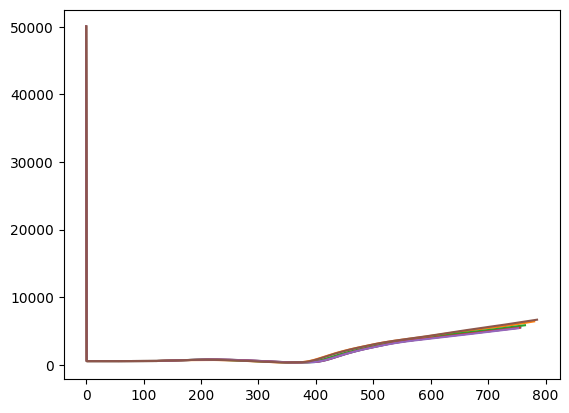

In [185]:
for weather in range(6):
    df_avg = df_array[weather][0]['cvip']
    for i in range(1, len(df_array[weather])): 
        df_avg += df_array[weather][i]['cvip']
    df_avg.interpolate().dropna()/100
    df_avg.plot()

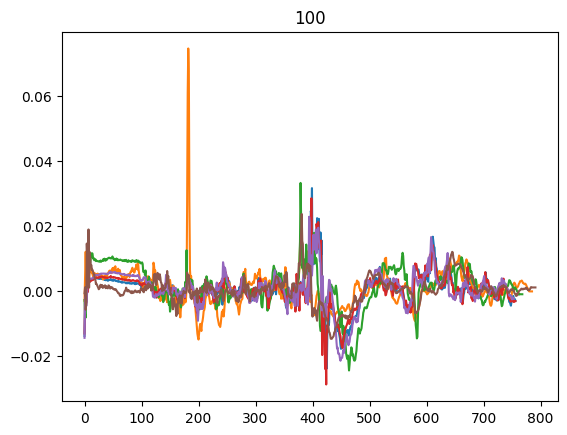

In [216]:
legend = ['clear', '80', '60', '20', '40', '100']
df_avg_dict = {}
for weather in range(6):
    df_avg = df_array[weather][0]['steer']
    for i in range(1, len(df_array[weather])): 
        df_avg += df_array[weather][i]['steer']
    df_avg = df_avg.interpolate().dropna()/100
    df_avg_dict.update({legend[weather]: df_avg.copy()})
    df_avg.plot()
plt.title(legend[weather])
plt.show()

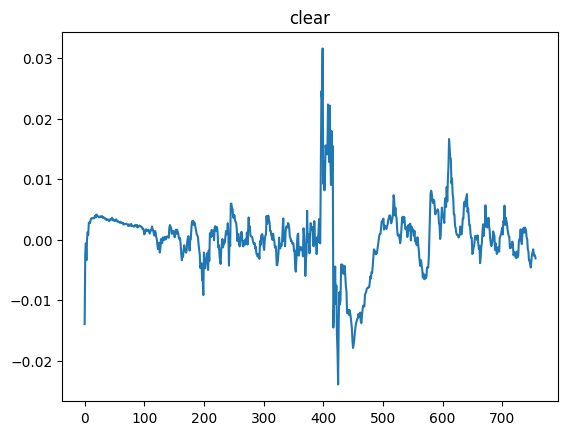

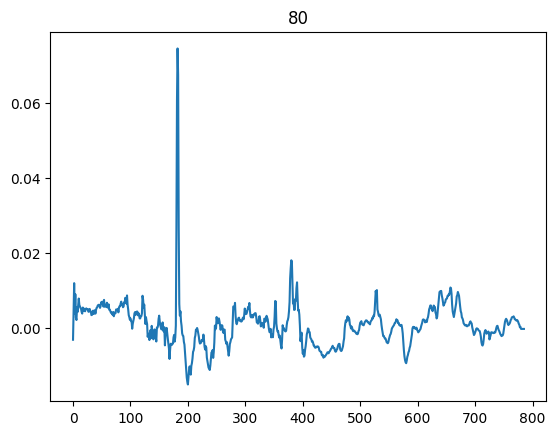

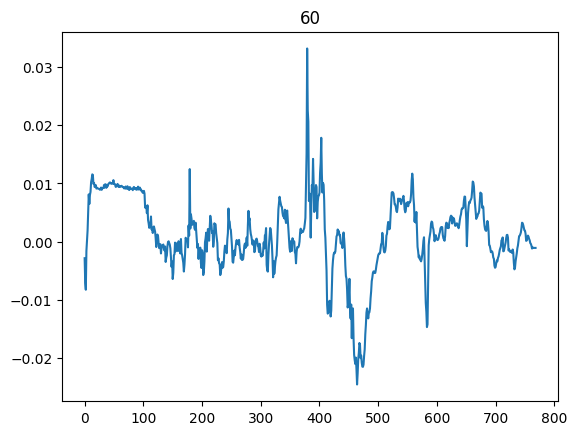

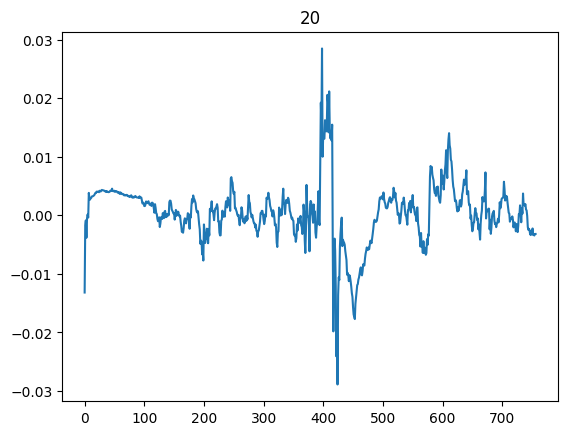

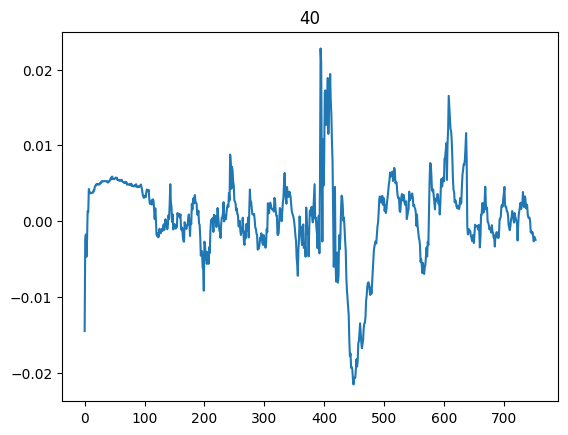

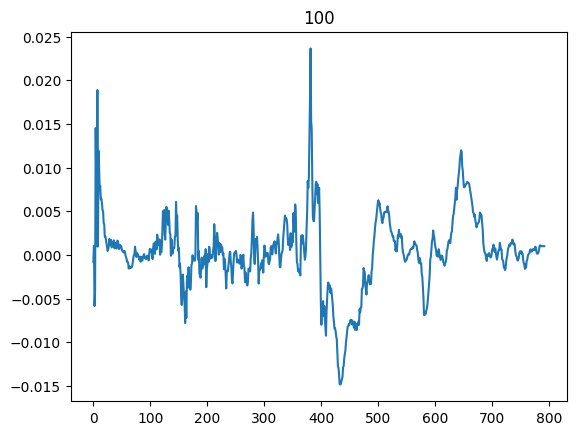

In [195]:
legend = ['clear', '80', '60', '20', '40', '100']
df_avg_dict = {}
for weather in range(6):
    df_avg = df_array[weather][0]['steer']
    for i in range(1, len(df_array[weather])): 
        df_avg += df_array[weather][i]['steer']
    df_avg = df_avg.interpolate().dropna()/100
    df_avg_dict.update({legend[weather]: df_avg.copy()})
    df_avg.plot(y="Age")
    plt.title(legend[weather])
    plt.show()

In [196]:
legend = ['clear', '80', '60', '20', '40', '100']
for i in legend:
    print(df_avg_dict[i])

0     -0.013973
1     -0.002549
2     -0.000622
3     -0.003409
4      0.000057
         ...   
752   -0.001607
753   -0.002265
754   -0.002712
755   -0.002614
756   -0.003109
Name: steer, Length: 757, dtype: float64
0     -0.003100
1      0.004723
2      0.012000
3      0.003796
4      0.009048
         ...   
781   -0.000211
782   -0.000211
783   -0.000211
784   -0.000211
785   -0.000211
Name: steer, Length: 786, dtype: float64
0     -0.002861
1     -0.007110
2     -0.008282
3     -0.001627
4     -0.000015
         ...   
764   -0.001090
765   -0.001090
766   -0.001090
767   -0.001090
768   -0.001090
Name: steer, Length: 769, dtype: float64
0     -0.013188
1     -0.001763
2     -0.000871
3     -0.003838
4     -0.000522
         ...   
752   -0.003380
753   -0.003282
754   -0.003448
755   -0.003189
756   -0.003189
Name: steer, Length: 757, dtype: float64
0     -0.014522
1     -0.002481
2     -0.001771
3     -0.004717
4     -0.002600
         ...   
749   -0.002136
750   -0.002677
751 

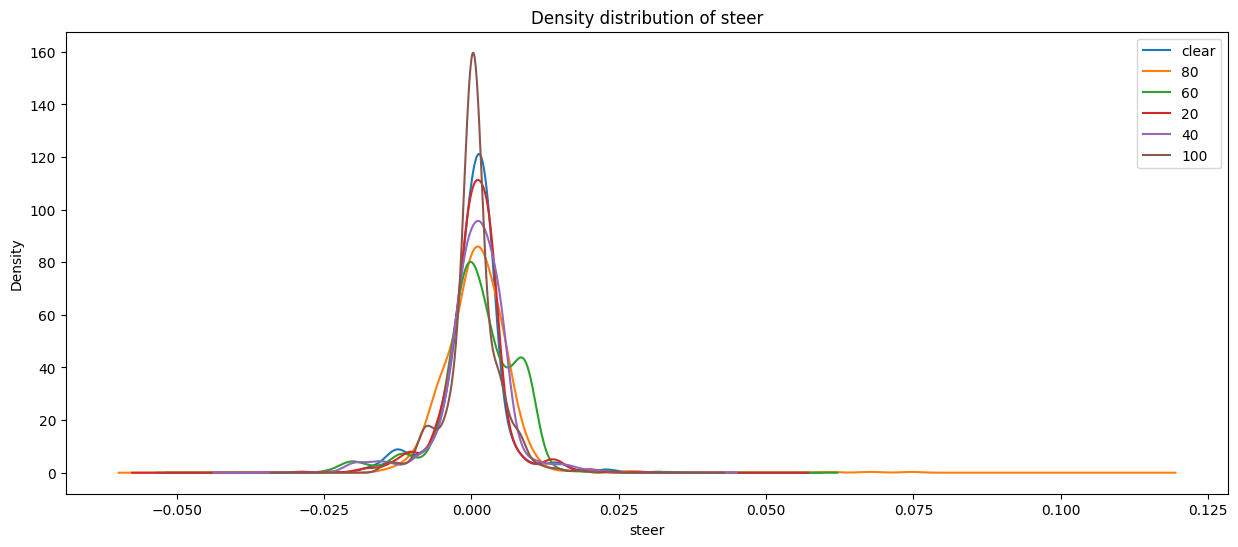

In [217]:
fig = plt.figure(figsize=(15, 6))

for i in legend:
    df_avg_dict[i].plot.density()
plt.xlabel("steer")
plt.title('Density distribution of steer')
plt.legend(legend)
plt.show()

### Dynamic time warping (DTW): measuring similarity between two temporal sequences

In [205]:
result = []
for i in legend:
    distance = dtw.distance(df_avg_dict['clear'], df_avg_dict[i])
    result.append((distance, i))

In [213]:
result.sort(key=lambda y: y[0])
print(result)

[(0.0, 'clear'), (0.02779703458004904, '20'), (0.04738881121655588, '40'), (0.05827608941554895, '100'), (0.0770693574504234, '60'), (0.09782514915937235, '80')]
